# Основные концепции Machine Learning. Домашняя работа

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('1_8_phones.csv')

In [5]:
df.head()

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013


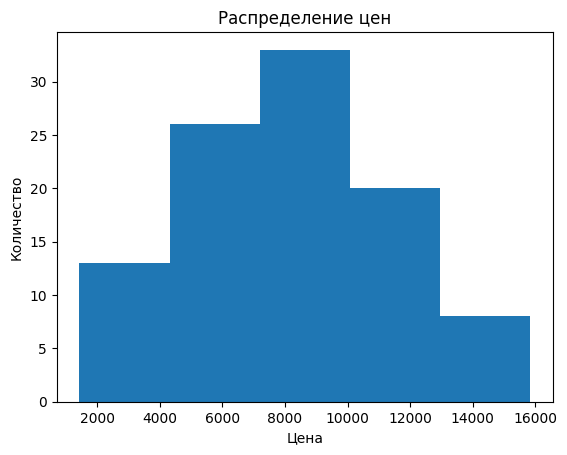

In [7]:

plt.hist(df["price"], bins=5)
plt.xlabel("Цена")
plt.ylabel("Количество")
plt.title("Распределение цен")
plt.show()


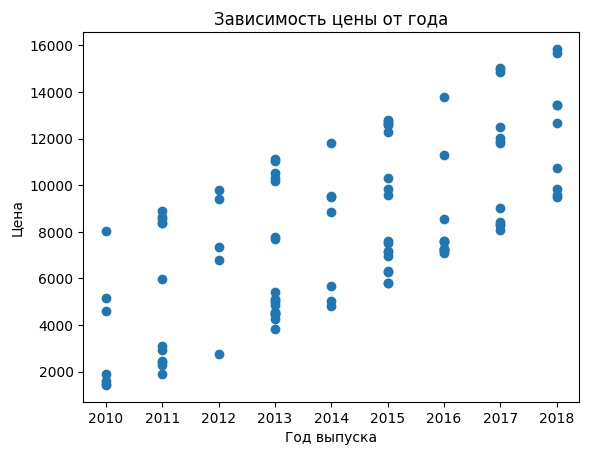

In [8]:
plt.scatter(df["year"], df["price"])
plt.xlabel("Год выпуска")
plt.ylabel("Цена")
plt.title("Зависимость цены от года")
plt.show()


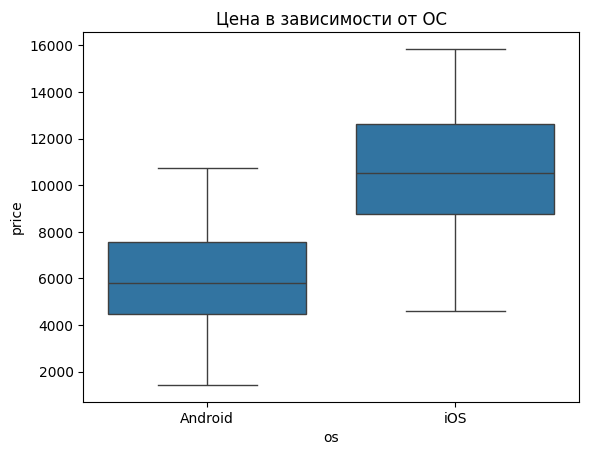

In [10]:
import seaborn as sns

sns.boxplot(x="os", y="price", data=df)
plt.title("Цена в зависимости от ОС")
plt.show()


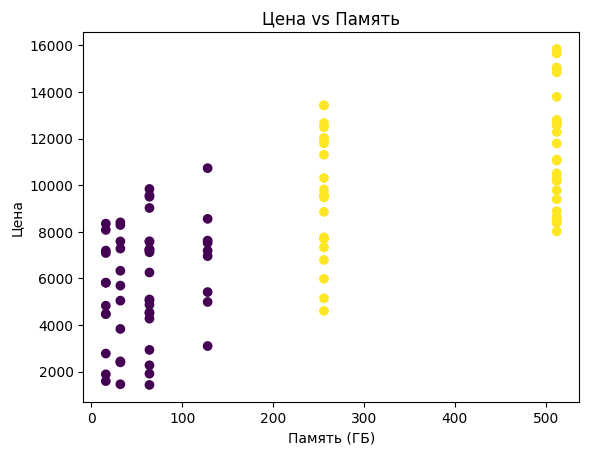

In [11]:
plt.scatter(df["disk"], df["price"], c=(df["os"] == "iOS"))
plt.xlabel("Память (ГБ)")
plt.ylabel("Цена")
plt.title("Цена vs Память")
plt.show()


## Задание 1: обучить модель регрессии

In [12]:
X = df[['disk','os','year']]
y = df['price']

In [13]:
X

,disk,os,year
0,64,Android,2016
1,128,Android,2015
2,64,Android,2010
3,512,iOS,2017
4,16,Android,2013
...,...,...,...
95,512,iOS,2011
96,64,Android,2016
97,32,Android,2014
98,32,Android,2016


In [15]:
X = pd.get_dummies(X, columns=["os"], drop_first=True)

In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression().fit(X,y)

In [17]:
print("Коэффициенты:", model.coef_)
print("Свободный член:", model.intercept_)

Коэффициенты: [  10.38269781 1012.58504634 1400.07501073]
Свободный член: -2034371.5098810836


In [19]:
y_pred = model.predict(X)
results = pd.DataFrame({"Реальное": y, "Предсказанное": y_pred})
results

,Реальное,Предсказанное
0,7256,7664.436206
1,7623,7316.343820
2,1916,1588.925928
3,15045,14728.544884
4,4478,4128.311572
...,...,...
95,8398,8653.034606
96,7197,7664.436206
97,5694,5307.019784
98,7589,7332.189876


## Задание 2: обучить модель классификации

In [20]:
X = df[["disk", "price", "year"]]
y = df["os"]

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
cl = DecisionTreeClassifier().fit(X, y)

In [ ]:
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



    disk       os  price  year  cluster
0     64  Android   7256  2016        1
1    128  Android   7623  2015        1
2     64  Android   1916  2010        1
3    512      iOS  15045  2017        0
4     16  Android   4478  2013        1
..   ...      ...    ...   ...      ...
95   512      iOS   8398  2011        1
96    64  Android   7197  2016        1
97    32  Android   5694  2014        1
98    32  Android   7589  2016        1
99   256      iOS   9533  2014        0

[100 rows x 5 columns]


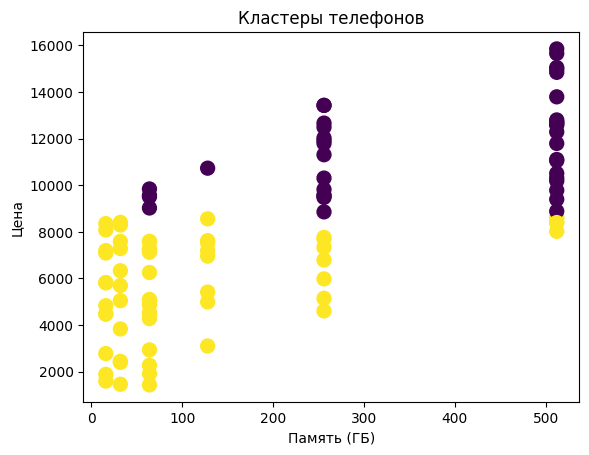

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Признаки для кластеризации
X = df[["disk", "price", "year"]]

# KMeans с 2 кластерами (так как у нас 2 ОС)
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# Добавляем кластеры в DataFrame
df["cluster"] = clusters
print(df)

# Визуализация по памяти и цене
plt.scatter(df["disk"], df["price"], c=df["cluster"], cmap="viridis", s=100)
plt.xlabel("Память (ГБ)")
plt.ylabel("Цена")
plt.title("Кластеры телефонов")
plt.show()
